# TELECO CUSTOMER CHURN
 Using the Telco_customer_churn Dataset to carry out kmeans clustering and identify different customer segments to implement targeted marketing and services to efficiently utilize the  resources.

## BUSINESS OBJECTIVE
* Maximize Service quality
* Identify Customer segments
* Maximize profits and revenue
* Minimize churn rate
* Identify influencing factors

## CONSTRAINTS
* Competitive pricing and profit margins
* Operational costs

## DATA DICTIONARY

| **slno** |        **Name of Feature**        | **Description**                                                                                                                                                                             | **Type** | **Relevance** |
|:--------:|:---------------------------------|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:--------:|:-------------:|
|     1    | Customer ID                       | A unique ID that identifies each customer.                                                                                                                                                  | Nominal  |   Irrelevant  |
|     2    | Count                             | A value used in reporting/dashboarding to sum up the number of customers in a filtered set.                                                                                                 | Nominal  |   Irrelevant  |
|     3    | Quarter                           | The fiscal quarter that the data has been derived from (e.g. Q3)                                                                                                                            | Nominal  |   Irrelevant  |
|     4    | Referred a Friend                 | Indicates if the customer has ever referred a friend or family member to this company: Yes, No                                                                                              | Binary   |    Relevant   |
|     5    | Number of Referrals               | Indicates the number of referrals to date that the customer has made.                                                                                                                       | Ratio    |    Relevant   |
|     6    | Tenure in Months                  | Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.                                                                 | Ratio    |    Relevant   |
|     7    | Offer                             | Identifies the last marketing offer that the customer accepted, if applicable. Values include None, Offer A, Offer B, Offer C, Offer D, and Offer E.                                        | Nominal  |    Relevant   |
|     8    | Phone Service                     | Identifies the last marketing offer that the customer accepted, if applicable. Values include None, Offer A, Offer B, Offer C, Offer D, and Offer E.                                        | Binary   |    Relevant   |
|     9    | Avg Monthly Long Distance Charges | Indicates the customer’s average long distance charges, calculated to the end of the quarter specified above.                                                                               | Ratio    |    Relevant   |
|    10    | Multiple Lines                    | Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No                                                                                                  | Binary   |    Relevant   |
|    11    | Internet Service                  | Indicates if the customer subscribes to Internet service with the company: Yes, No.                                                                                                         | Binary   |    Relevant   |
|    12    | Internet Type                     | Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.                                                                                     | Nominal  |    Relevant   |
|    13    | Avg Monthly GB Download           | Indicates the customer’s average download volume in gigabytes, calculated to the end of the quarter specified above.                                                                        | Ratio    |    Relevant   |
|    14    | Online Security                   | Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No                                                                              | Binary   |    Relevant   |
|    15    | Online Backup                     | Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No                                                                                | Binary   |    Relevant   |
|    16    | Device Protection Plan            | Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No                                                  | Binary   |    Relevant   |
|    17    | Premium Tech Support              | Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No                                                              | Binary   |    Relevant   |
|    18    | Streaming TV                      | Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service. | Binary   |    Relevant   |
|    19    | Streaming Movies                  | Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.                | Binary   |    Relevant   |
|    20    | Streaming Music                   | Indicates if the customer uses their Internet service to stream music from a third party provider: Yes, No. The company does not charge an additional fee for this service.                 | Binary   |    Relevant   |
|    21    | Unlimited Data                    | Indicates if the customer has paid an additional monthly fee to have unlimited data downloads/uploads: Yes, No                                                                              | Binary   |    Relevant   |
|    22    | Contract                          | Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.                                                                                                         | Nominal  |    Relevant   |
|    23    | Paperless Billing                 | Indicates if the customer has chosen paperless billing: Yes, No                                                                                                                             | Binary   |    Relevant   |
|    24    | Payment Method                    | Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check                                                                                                      | Nominal  |    Relevant   |
|    25    | Monthly Charge                    | Indicates the customer’s current total monthly charge for all their services from the company.                                                                                              | Ratio    |    Relevant   |
|    26    | Total Charges                     | Indicates the customer’s total charges, calculated to the end of the quarter specified above.                                                                                               | Ratio    |    Relevant   |
|    27    | Total Refunds                     | Indicates the customer’s total refunds, calculated to the end of the quarter specified above.                                                                                               | Ratio    |    Relevant   |
|    28    | Total Extra Data Charges          | Indicates the customer’s total charges for extra data downloads above those specified in their plan, by the end of the quarter specified above.                                             | Ratio    |    Relevant   |
|    29    | Total Long Distance Charges       | Indicates the customer’s total charges for long distance above those specified in their plan, by the end of the quarter specified above.                                                    | Ratio    |    Relevant   |
|    30    | Total Revenue                     | Indicates the Total Revenue.                                                                                                                                                                | Ratio    |    Relevant   |

Importing the required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from feature_engine.outliers import Winsorizer
from termcolor import colored
from sklearn.impute import SimpleImputer

Loading the dataset using the pandas library and confirming the dataset has been loaded properly using the 'head' function

In [2]:
df0 = pd.read_excel(r"D:\360Digitmg\ASSIGNMENTS\Ass6\Telco_customer_churn.xlsx")
df=df0.copy()
df.head()

,Customer ID,Count,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,8779-QRDMV,1,Q3,No,0,1,None,No,0.00,No,...,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65
1,7495-OOKFY,1,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,...,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10
2,1658-BYGOY,1,Q3,No,0,18,Offer D,Yes,11.33,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88
3,4598-XLKNJ,1,Q3,Yes,1,25,Offer C,Yes,19.76,No,...,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07
4,4846-WHAFZ,1,Q3,Yes,1,37,Offer C,Yes,6.33,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36


### EXPLORATORY DATA ANALYSIS

The below three lines give a general idea about the dataset like the shape, type and non null values.

In [3]:
df.shape

(7043, 30)

In [4]:
df.dtypes

Customer ID                           object
Count                                  int64
Quarter                               object
Referred a Friend                     object
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download                int64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  object
Streaming TV                          object
Streaming Movies                      object
Streaming Music                       object
Unlimited Data                        object
Contract                              object
Paperless 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Count                              7043 non-null   int64  
 2   Quarter                            7043 non-null   object 
 3   Referred a Friend                  7043 non-null   object 
 4   Number of Referrals                7043 non-null   int64  
 5   Tenure in Months                   7043 non-null   int64  
 6   Offer                              7043 non-null   object 
 7   Phone Service                      7043 non-null   object 
 8   Avg Monthly Long Distance Charges  7043 non-null   float64
 9   Multiple Lines                     7043 non-null   object 
 10  Internet Service                   7043 non-null   object 
 11  Internet Type                      7043 non-null   objec

The describe function gives the count, min, max, mean, standard deviation and quantile values of the dataset.

In [6]:
df.describe()

,Count,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,1.951867,32.386767,22.958954,20.515405,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,0.0,3.001199,24.542061,15.448113,20.418940,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,1.0,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,1.0,0.000000,9.000000,9.210000,3.000000,35.500000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,1.0,0.000000,29.000000,22.890000,17.000000,70.350000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,1.0,3.000000,55.000000,36.395000,27.000000,89.850000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,1.0,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [7]:
print(colored("Descriptive Statistics of Categorical Columns :\n\n",'blue',attrs=['bold']),df.describe(include=object).T)

Descriptive Statistics of Categorical Columns :

                        count unique              top  freq
Customer ID             7043   7043       8779-QRDMV     1
Quarter                 7043      1               Q3  7043
Referred a Friend       7043      2               No  3821
Offer                   7043      6             None  3877
Phone Service           7043      2              Yes  6361
Multiple Lines          7043      2               No  4072
Internet Service        7043      2              Yes  5517
Internet Type           7043      4      Fiber Optic  3035
Online Security         7043      2               No  5024
Online Backup           7043      2               No  4614
Device Protection Plan  7043      2               No  4621
Premium Tech Support    7043      2               No  4999
Streaming TV            7043      2               No  4336
Streaming Movies        7043      2               No  4311
Streaming Music         7043      2               No  4555
Unlimi

Checking the Number of Duplicates in the Dataset.

In [8]:
duplicate_values=df.duplicated(subset=None,keep='first').sum()
print(colored(' Number of Duplicate values: ','blue',attrs=['bold']),duplicate_values)

 Number of Duplicate values:  0


Checking the Number of Missing Values in the Dataset.

In [9]:
missing=df.isna().sum().sort_values(ascending=False)
print(colored("Number of Missing Values\n\n",'blue',attrs=['bold']),missing)

Number of Missing Values

 Customer ID                          0
Count                                0
Total Long Distance Charges          0
Total Extra Data Charges             0
Total Refunds                        0
Total Charges                        0
Monthly Charge                       0
Payment Method                       0
Paperless Billing                    0
Contract                             0
Unlimited Data                       0
Streaming Music                      0
Streaming Movies                     0
Streaming TV                         0
Premium Tech Support                 0
Device Protection Plan               0
Online Backup                        0
Online Security                      0
Avg Monthly GB Download              0
Internet Type                        0
Internet Service                     0
Multiple Lines                       0
Avg Monthly Long Distance Charges    0
Phone Service                        0
Offer                                

In [10]:
print(colored('Number of Unique Values:\n\n','blue',attrs=['bold']),df.nunique())

Number of Unique Values:

 Customer ID                          7043
Count                                   1
Quarter                                 1
Referred a Friend                       2
Number of Referrals                    12
Tenure in Months                       72
Offer                                   6
Phone Service                           2
Avg Monthly Long Distance Charges    3584
Multiple Lines                          2
Internet Service                        2
Internet Type                           4
Avg Monthly GB Download                50
Online Security                         2
Online Backup                           2
Device Protection Plan                  2
Premium Tech Support                    2
Streaming TV                            2
Streaming Movies                        2
Streaming Music                         2
Unlimited Data                          2
Contract                                3
Paperless Billing                       2
Payment

Count and Quarter have just one value throughout the entire column so we will remove it.

### First Moment Business Decision or Measures of Central Tendency.
* It gives the mean, median and mode values of the dataset.
* Mean is the average of the data and it easily gets influenced by the outliers.
* Median is the middle most value of the dataset.
* Mode is the most repeated value of the dataset.
* If the mean, median & mode are same then the data has normal distribution otherwise the distribution is not normal.

In [11]:
df.mean()

C:\Users\lenny\AppData\Local\Temp\ipykernel_27116\3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


Count                                   1.000000
Number of Referrals                     1.951867
Tenure in Months                       32.386767
Avg Monthly Long Distance Charges      22.958954
Avg Monthly GB Download                20.515405
Monthly Charge                         64.761692
Total Charges                        2280.381264
Total Refunds                           1.962182
Total Extra Data Charges                6.860713
Total Long Distance Charges           749.099262
Total Revenue                        3034.379056
dtype: float64

In [12]:
df.median()

C:\Users\lenny\AppData\Local\Temp\ipykernel_27116\530051474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


Count                                   1.00
Number of Referrals                     0.00
Tenure in Months                       29.00
Avg Monthly Long Distance Charges      22.89
Avg Monthly GB Download                17.00
Monthly Charge                         70.35
Total Charges                        1394.55
Total Refunds                           0.00
Total Extra Data Charges                0.00
Total Long Distance Charges           401.44
Total Revenue                        2108.64
dtype: float64

In [13]:
stats.mode(df)

ModeResult(mode=array([['0002-ORFBO', 1, 'Q3', 'No', 0, 1, 'None', 'Yes', 0.0, 'No',
        'Yes', 'Fiber Optic', 0, 'No', 'No', 'No', 'No', 'No', 'No',
        'No', 'Yes', 'Month-to-Month', 'Yes', 'Bank Withdrawal', 20.05,
        20.2, 0.0, 0, 0.0, 24.8]], dtype=object), count=array([[   1, 7043, 7043, 3821, 3821,  613, 3877, 6361,  682, 4072, 5517,
        3035, 1526, 5024, 4614, 4621, 4999, 4336, 4311, 4555, 4745, 3610,
        4171, 3909,   61,   11, 6518, 6315,  682,    3]]))

### Second Moment Business Decision or Measures of Dispersion
* It contains Variance, Standard Deviation & Range.
* It gives a general idea about the spread of data in the dataset.
* Variance is the average squared distance of each data point from the mean.
* Standard deviation is the root of the variance.
* Range is the difference between the max and min data point of the dataset.

In [14]:
df.var()

C:\Users\lenny\AppData\Local\Temp\ipykernel_27116\1568254755.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()


Count                                0.000000e+00
Number of Referrals                  9.007197e+00
Tenure in Months                     6.023128e+02
Avg Monthly Long Distance Charges    2.386442e+02
Avg Monthly GB Download              4.169331e+02
Monthly Charge                       9.054109e+02
Total Charges                        5.135755e+06
Total Refunds                        6.245131e+01
Total Extra Data Charges             6.302599e+02
Total Long Distance Charges          7.168332e+05
Total Revenue                        8.209397e+06
dtype: float64

In [15]:
df.std()

C:\Users\lenny\AppData\Local\Temp\ipykernel_27116\3390915376.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std()


Count                                   0.000000
Number of Referrals                     3.001199
Tenure in Months                       24.542061
Avg Monthly Long Distance Charges      15.448113
Avg Monthly GB Download                20.418940
Monthly Charge                         30.090047
Total Charges                        2266.220462
Total Refunds                           7.902614
Total Extra Data Charges               25.104978
Total Long Distance Charges           846.660055
Total Revenue                        2865.204542
dtype: float64

In [16]:
df.columns

Index(['Customer ID', 'Count', 'Quarter', 'Referred a Friend',
       'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue'],
      dtype='object')

In [17]:
Range=df[['Number of Referrals', 'Tenure in Months','Avg Monthly Long Distance Charges','Avg Monthly GB Download','Monthly Charge', 'Total Charges', 'Total Refunds','Total Extra Data Charges', 'Total Long Distance Charges','Total Revenue']].max()-df[['Number of Referrals', 'Tenure in Months','Avg Monthly Long Distance Charges','Avg Monthly GB Download','Monthly Charge', 'Total Charges', 'Total Refunds','Total Extra Data Charges', 'Total Long Distance Charges','Total Revenue']].min()
Range

Number of Referrals                     11.00
Tenure in Months                        71.00
Avg Monthly Long Distance Charges       49.99
Avg Monthly GB Download                 85.00
Monthly Charge                         100.50
Total Charges                         8666.00
Total Refunds                           49.79
Total Extra Data Charges               150.00
Total Long Distance Charges           3564.72
Total Revenue                        11957.98
dtype: float64

### THIRD MOMENT BUSINESS DECISION OR SKEWNESS
* Skewness gives the measure of asymmetry in a data.
* The types of skewness are as follows:
    * Negative skewness or left skewed.
    * Positive skewness or right skewed.
    * If skewness = 0 then it is normally distributed.

In [18]:
df.skew()

C:\Users\lenny\AppData\Local\Temp\ipykernel_27116\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Count                                0.000000
Number of Referrals                  1.446060
Tenure in Months                     0.240543
Avg Monthly Long Distance Charges    0.049176
Avg Monthly GB Download              1.216584
Monthly Charge                      -0.220524
Total Charges                        0.963791
Total Refunds                        4.328517
Total Extra Data Charges             4.091209
Total Long Distance Charges          1.238282
Total Revenue                        0.919410
dtype: float64

### FOURTH MOMENT BUSINESS DECISION OR KURTOSIS
* Kurtosis is the peakedness of the distribution.
* Negative kurtosis implies a wider peak and thinner tails.
* Positive kurtosis implies a narrow peak and wider tails.

In [19]:
df.kurt()

C:\Users\lenny\AppData\Local\Temp\ipykernel_27116\1257127604.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurt()


Count                                 0.000000
Number of Referrals                   0.721964
Tenure in Months                     -1.387052
Avg Monthly Long Distance Charges    -1.254654
Avg Monthly GB Download               0.881502
Monthly Charge                       -1.257260
Total Charges                        -0.227693
Total Refunds                        18.350658
Total Extra Data Charges             16.458874
Total Long Distance Charges           0.644092
Total Revenue                        -0.203457
dtype: float64

### GRAPHICAL REPRESENTATION

Plotting histograms of each variable.

C:\Users\lenny\AppData\Local\Temp\ipykernel_27116\2993202899.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax)


<function matplotlib.pyplot.show(close=None, block=None)>

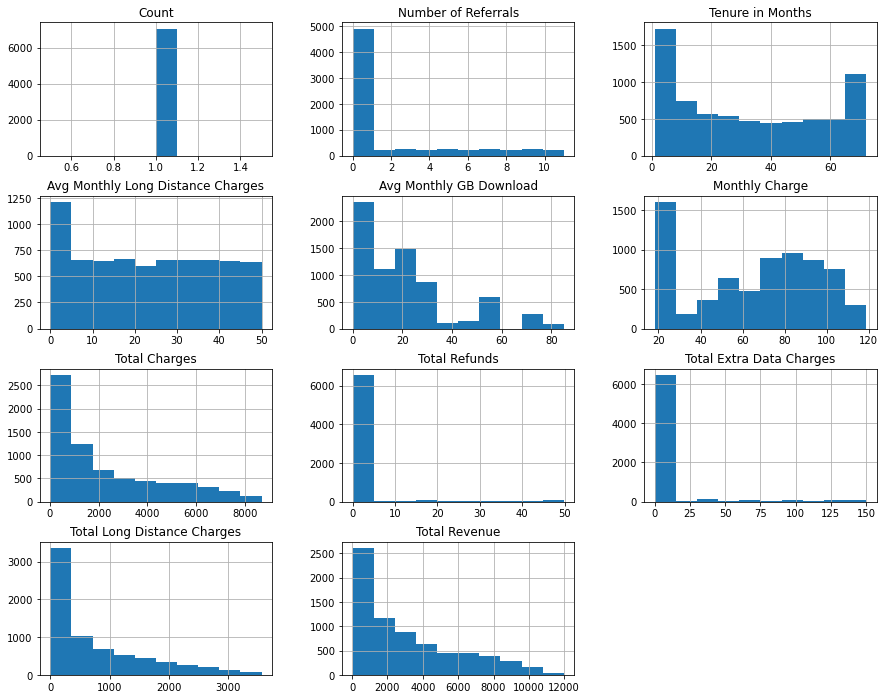

In [20]:
fig=plt.figure(figsize=(15,12))
ax=fig.gca()
df.hist(ax=ax)
plt.show

Plotting boxplots of each variable.

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Number of Referrals'>

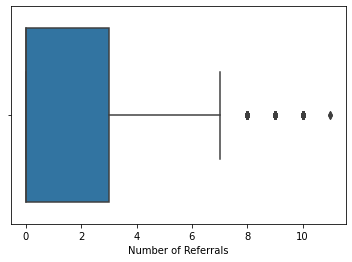

In [21]:
sns.boxplot(df['Number of Referrals'])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Tenure in Months'>

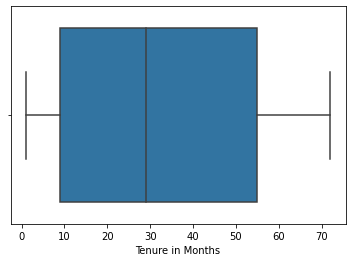

In [22]:
sns.boxplot(df['Tenure in Months'])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Avg Monthly Long Distance Charges'>

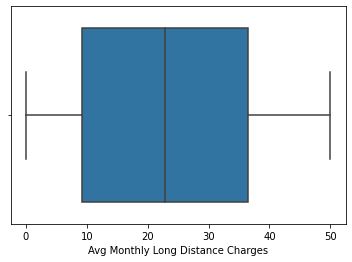

In [23]:
sns.boxplot(df['Avg Monthly Long Distance Charges'])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Avg Monthly GB Download'>

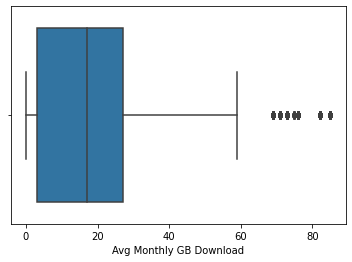

In [24]:
sns.boxplot(df['Avg Monthly GB Download'])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Monthly Charge'>

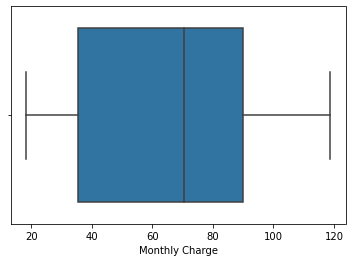

In [25]:
sns.boxplot(df['Monthly Charge'])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total Charges'>

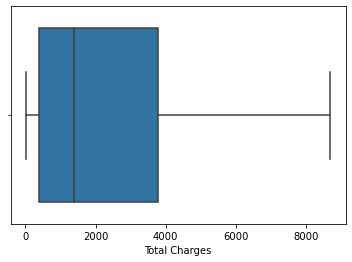

In [26]:
sns.boxplot(df['Total Charges'])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total Long Distance Charges'>

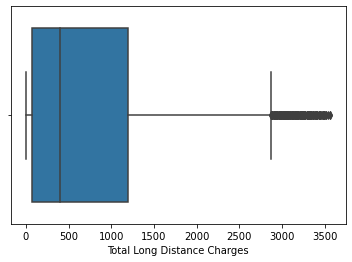

In [27]:
sns.boxplot(df['Total Long Distance Charges'])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total Revenue'>

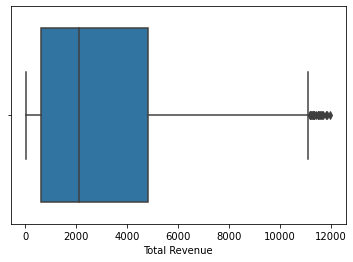

In [28]:
sns.boxplot(df['Total Revenue'])

From the boxplots it is very evident that there are outliers in the dataset so using the below custom function calculated the number of outliers in each variable.

In [29]:
#Defining a custom function to get the number of outliers present as doing the steps again would just add extra lines 
def outlier_func(i):
    x=i.quantile(0.25)-((i.quantile(0.75)-i.quantile(0.25))*1.5)
    y=i.quantile(0.75)+((i.quantile(0.75)-i.quantile(0.25))*1.5)
    outliers= np.where(i > y, True, np.where(i < x, True, False))
    return(outliers)

In [30]:
sum(outlier_func(df['Number of Referrals']))

676

In [31]:
sum(outlier_func(df['Avg Monthly GB Download']))

362

In [32]:
sum(outlier_func(df['Total Long Distance Charges']))

196

In [33]:
sum(outlier_func(df['Total Revenue']))

21

Using winsorization to rectify the outliers to avoid data lose.The module used for Winsorization is feature_engine

In [34]:
winsor= Winsorizer(capping_method='iqr',
                   tail='both',
                   fold=1.5,
                   variables=['Number of Referrals'])

df['Number of Referrals']= winsor.fit_transform(df[['Number of Referrals']])
sum(outlier_func(df['Number of Referrals']))

0

In [35]:
winsor= Winsorizer(capping_method='iqr',
                   tail='both',
                   fold=1.5,
                   variables=["Avg Monthly GB Download"])

df["Avg Monthly GB Download"]= winsor.fit_transform(df[["Avg Monthly GB Download"]])
sum(outlier_func(df["Avg Monthly GB Download"]))

0

In [36]:
winsor= Winsorizer(capping_method='iqr',
                   tail='both',
                   fold=1.5,
                   variables=["Total Long Distance Charges"])

df["Total Long Distance Charges"]= winsor.fit_transform(df[["Total Long Distance Charges"]])
sum(outlier_func(df["Total Long Distance Charges"]))

0

In [37]:
winsor= Winsorizer(capping_method='iqr',
                   tail='both',
                   fold=1.5,
                   variables=["Total Revenue"])

df["Total Revenue"]= winsor.fit_transform(df[["Total Revenue"]])
sum(outlier_func(df["Total Revenue"]))

0

Again plotting boxplots after winsorization

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Number of Referrals'>

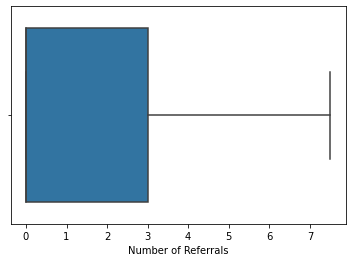

In [38]:
sns.boxplot(df['Number of Referrals'])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Avg Monthly GB Download'>

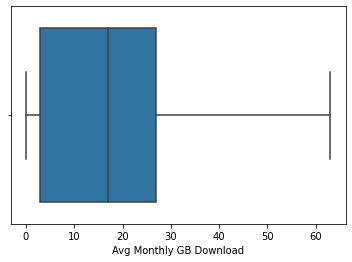

In [39]:
sns.boxplot(df['Avg Monthly GB Download'])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total Long Distance Charges'>

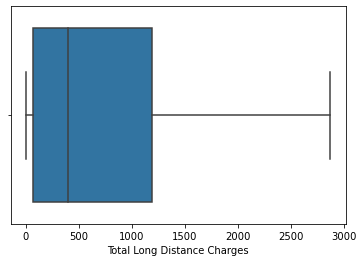

In [40]:
sns.boxplot(df['Total Long Distance Charges'])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total Revenue'>

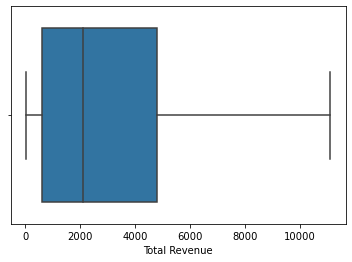

In [41]:
sns.boxplot(df['Total Revenue'])

### BIVARIATE ANALYSIS USING SCATTER PLOT

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Total Revenue'>

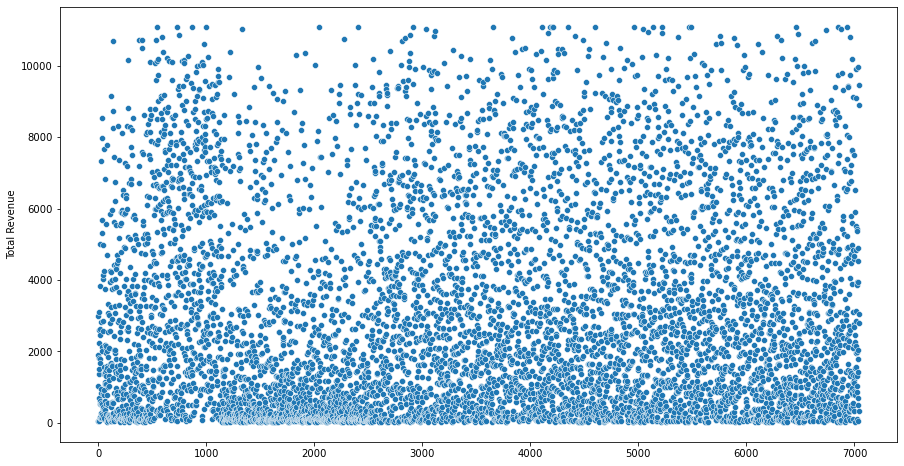

In [45]:
plt.figure(figsize=(15,8))
sns.scatterplot(df.index,df['Total Revenue'])

### REMOVING THE COLUMNS
As the Customer ID column doesn't help in the clustering so it is removed whereas the Count and Quarter columns have just one unique value so it also will not help in the clustering.

In [46]:
df1=df.drop(['Customer ID', 'Count', 'Quarter'],axis=1)
df1.head(3)

,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,No,0.0,1,None,No,0.00,No,Yes,DSL,8.0,...,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65
1,Yes,1.0,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17.0,...,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10
2,No,0.0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,52.0,...,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88


### COLUMN TRANSFORMER
Using the column transformer the categorical columns are one hot encoded and the numerical values are normalized using the minmax scaler.The column transformer help to do both at the same time without writing separate codes for both onehot encoding and scaling.

In [47]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
columntransformer=ColumnTransformer(transformers=[
    (' ',scaler,['Number of Referrals','Tenure in Months','Avg Monthly Long Distance Charges','Avg Monthly GB Download','Monthly Charge','Total Charges','Total Refunds','Total Extra Data Charges','Total Long Distance Charges','Total Revenue']),
    ('  ',OneHotEncoder(sparse=True,drop='first',dtype=np.int64),['Referred a Friend','Offer','Phone Service','Multiple Lines','Internet Service','Internet Type','Online Security','Online Backup','Device Protection Plan','Premium Tech Support','Streaming TV','Streaming Movies','Streaming Music','Unlimited Data','Contract','Paperless Billing','Payment Method'])
    
],remainder="passthrough")

In [48]:
df2=pd.DataFrame(columntransformer.fit_transform(df1))
df2.columns=columntransformer.get_feature_names_out()
df2.head(2)

,__Number of Referrals,__Tenure in Months,__Avg Monthly Long Distance Charges,__Avg Monthly GB Download,__Monthly Charge,__Total Charges,__Total Refunds,__Total Extra Data Charges,__Total Long Distance Charges,__Total Revenue,...,__Premium Tech Support_Yes,__Streaming TV_Yes,__Streaming Movies_Yes,__Streaming Music_Yes,__Unlimited Data_Yes,__Contract_One Year,__Contract_Two Year,__Paperless Billing_Yes,__Payment Method_Credit Card,__Payment Method_Mailed Check
0,0.000000,0.000000,0.000000,0.126984,0.212935,0.002406,0.0,0.133333,0.000000,0.003458,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.133333,0.098592,0.977195,0.269841,0.620896,0.070909,0.0,0.000000,0.136076,0.090556,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


### DIMENSION REDUCTION USING PCA

In the belown cell the dataset is dimension reduced and the cummulative variance is also shown to get an idea about the percentage of data is retained.

In [49]:
from sklearn.decomposition import PCA
pca=PCA(n_components=18)
pca_values=pca.fit_transform(df2)
var=pca.explained_variance_ratio_
var1=np.cumsum(np.round(var,decimals=4)*100)
var1

array([24.15, 35.26, 43.73, 49.23, 54.13, 58.61, 62.54, 66.22, 69.41,
       72.4 , 75.27, 77.82, 80.24, 82.63, 84.88, 86.76, 88.56, 90.2 ])

Text(0, 0.5, 'Percentage of Data')

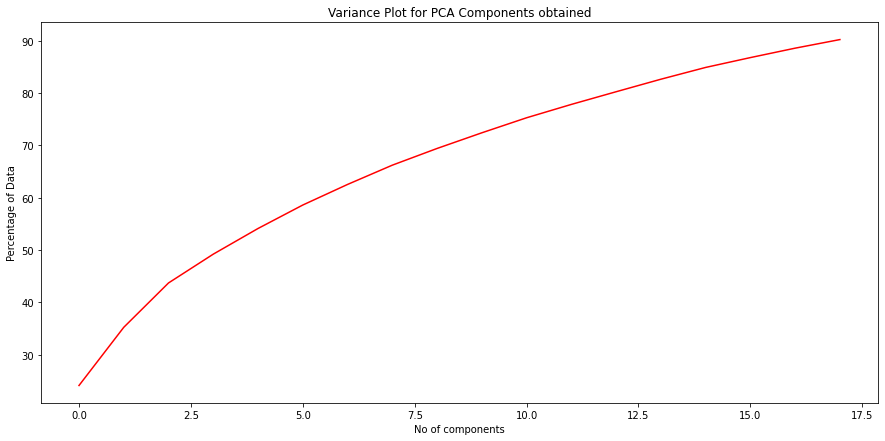

In [50]:
plt.figure(figsize=(15,7))
plt.plot(var1,color='red')
plt.title("Variance Plot for PCA Components obtained")
plt.xlabel("No of components")
plt.ylabel("Percentage of Data")

Fitting the dimension reduced values into a dataframe.

In [51]:
df3=pd.DataFrame(pca_values)
df3.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.486919,-0.668099,0.874282,0.577911,0.369616,-0.355870,0.334146,-0.705486,-0.090927,0.468423,-0.474109,0.646991,-0.355745,-0.291236,0.075071,-0.017753,0.411367,0.491490
1,-0.031260,-0.583295,-0.530884,-1.025443,-0.178020,0.021048,-0.947570,0.116900,0.238090,-0.600963,-0.410035,-0.058205,-0.338835,0.212169,0.376075,0.548233,-0.397467,-0.120433
2,0.796946,-1.204232,-0.661739,0.598062,0.189429,-0.263075,-0.049478,0.061165,0.549956,0.063065,-0.133353,-0.264999,0.275631,-0.303848,-0.086821,-0.544543,0.369162,-0.215699


### SCREE PLOT
Creating the Scree plot to get an idea about the number of clusters to choose for Kmeans Clustering.

In [52]:
from sklearn.cluster import KMeans
TWSS=[]
k=list(range(2,9))
for i in k:
    kmeans= KMeans(n_clusters=i)
    kmeans.fit(df3)
    TWSS.append(kmeans.inertia_)
TWSS

[26726.113484989248,
 22952.772797897596,
 21165.98461031544,
 20156.60683845363,
 19365.062647054307,
 18709.738916033974,
 18155.59582671671]

Text(0, 0.5, 'Total within SS')

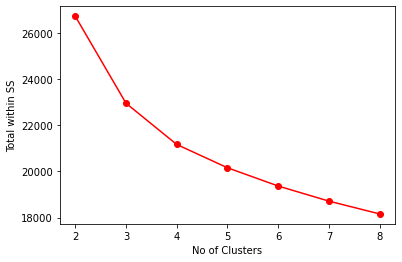

In [53]:
plt.plot(k,TWSS,'ro-');plt.xlabel("No of Clusters"); plt.ylabel("Total within SS")

The optimum number of cluster from the scree plot seems to be 3 or 4, so trying out both the options.

### NO OF CLUSTERS : 3

In [54]:
model=KMeans(n_clusters=3)
model.fit(df3)
model.labels_
mb=pd.Series(model.labels_)
dfc3= df.copy()
dfc3['clust']=mb
dfc3.head(3)

,Customer ID,Count,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,clust
0,8779-QRDMV,1,Q3,No,0.0,1,None,No,0.00,No,...,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65,0
1,7495-OOKFY,1,Q3,Yes,1.0,8,Offer E,Yes,48.85,Yes,...,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10,0
2,1658-BYGOY,1,Q3,No,0.0,18,Offer D,Yes,11.33,Yes,...,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88,0


In [55]:
df4_num3=dfc3.select_dtypes(exclude='number')
df4_num3['clust']=dfc3['clust']
df4_num3.groupby(df4_num3.clust).agg([pd.Series.mode]).T


,clust,0,1,2
Customer ID,mode,"[0002-ORFBO, 0003-MKNFE, 0004-TLHLJ, 0013-EXCH...","[0011-IGKFF, 0013-SMEOE, 0014-BMAQU, 0016-QLJI...","[0023-UYUPN, 0030-FNXPP, 0031-PVLZI, 0040-HALC..."
Quarter,mode,Q3,Q3,Q3
Referred a Friend,mode,No,Yes,No
Offer,mode,None,None,None
Phone Service,mode,Yes,Yes,Yes
Multiple Lines,mode,No,Yes,No
Internet Service,mode,Yes,Yes,No
Internet Type,mode,Fiber Optic,Fiber Optic,None
Online Security,mode,No,Yes,No
Online Backup,mode,No,Yes,No


In [56]:
dfc3.groupby(dfc3.clust).mean()

,Count,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
clust,,,,,,,,,,,
0,1.0,0.945827,17.454664,20.791866,24.705728,65.485663,1116.820393,1.847584,7.492635,333.212580,1456.458802
1,1.0,2.753759,52.028850,24.399772,26.243803,90.957720,4727.339069,2.296367,10.272247,1233.198091,5983.205253
2,1.0,1.999018,30.604453,24.972443,0.016372,21.094270,664.608703,1.652862,0.098232,762.964260,1433.641277


In [57]:
dfc3.groupby(dfc3.clust).count()

,Customer ID,Count,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
clust,,,,,,,,,,,,,,,,,,,,,
0,3055,3055,3055,3055,3055,3055,3055,3055,3055,3055,...,3055,3055,3055,3055,3055,3055,3055,3055,3055,3055
1,2461,2461,2461,2461,2461,2461,2461,2461,2461,2461,...,2461,2461,2461,2461,2461,2461,2461,2461,2461,2461
2,1527,1527,1527,1527,1527,1527,1527,1527,1527,1527,...,1527,1527,1527,1527,1527,1527,1527,1527,1527,1527


Text(0, 0.5, 'Total Revenue')

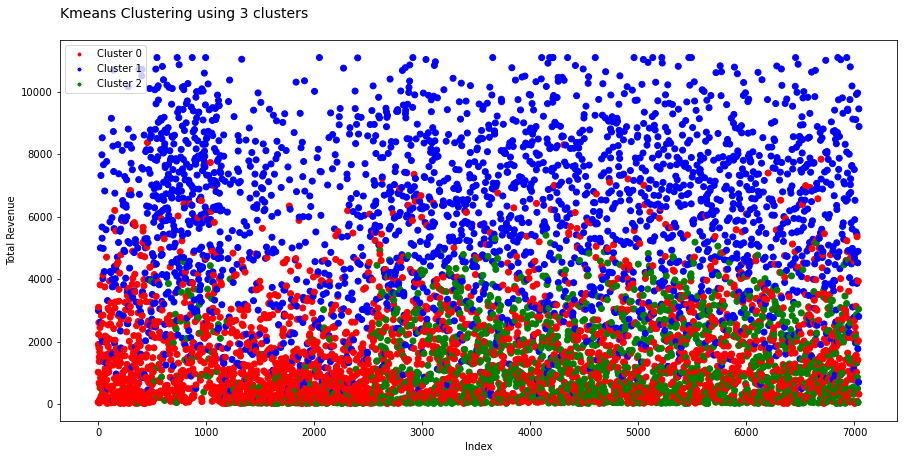

In [58]:
plt.figure(figsize=(15,7))
a3 = dfc3.clust.map({0:'red', 1:'blue', 2:'green'})
plt.scatter(dfc3.index,dfc3['Total Revenue'], c=a3)

from matplotlib.lines import Line2D
colors=['red','blue','green']
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i), 
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]

plt.legend(handles=legend_elements, loc='upper left')
plt.title('Kmeans Clustering using 3 clusters\n', loc='left', fontsize=14)
plt.xlabel('Index')
plt.ylabel('Total Revenue')

#### INSIGHTS
* Cluster 0 : This is a low revenue generating group which uses both long distance calls and Internet.They prefer to have a monthly contract and paperless billing and majority of the customers belong to this group. But they dont subscribe to the extra services provided by the service provider.
* Cluster 1 : This is a high revenue generating group which uses both long distance calls and Internet.They prefer to have a two yearly contract with paperless billing and close to 34% of the customers belong to this group.They subscribe to majority of the extra services provided by the service provider.This group also tends to refer their friends to the services. 
* Cluster 2 : This is a  low revenue generating group which uses only long distance calls.They prefer to have two yearly contract and credit card payments with paper billing.It has second most number of customers.

### NO OF CLUSTERS : 4

In [61]:
model=KMeans(n_clusters=4)
model.fit(df3)
model.labels_
mb=pd.Series(model.labels_)
dfc4= df.copy()
dfc4['clust']=mb
dfc4.head(3)

,Customer ID,Count,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,clust
0,8779-QRDMV,1,Q3,No,0.0,1,None,No,0.00,No,...,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65,0
1,7495-OOKFY,1,Q3,Yes,1.0,8,Offer E,Yes,48.85,Yes,...,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10,1
2,1658-BYGOY,1,Q3,No,0.0,18,Offer D,Yes,11.33,Yes,...,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88,1


In [62]:
df4_num4=dfc4.select_dtypes(exclude='number')
df4_num4['clust']=dfc4['clust']
df4_num4.groupby(df4_num4.clust).agg([pd.Series.mode]).T

,clust,0,1,2,3
Customer ID,mode,"[0002-ORFBO, 0015-UOCOJ, 0017-DINOC, 0019-GFNT...","[0003-MKNFE, 0004-TLHLJ, 0011-IGKFF, 0013-EXCH...","[0023-UYUPN, 0030-FNXPP, 0031-PVLZI, 0040-HALC...","[0013-SMEOE, 0014-BMAQU, 0016-QLJIS, 0017-IUDM..."
Quarter,mode,Q3,Q3,Q3,Q3
Referred a Friend,mode,No,No,No,Yes
Offer,mode,None,None,None,None
Phone Service,mode,Yes,Yes,Yes,Yes
Multiple Lines,mode,No,Yes,No,Yes
Internet Service,mode,Yes,Yes,No,Yes
Internet Type,mode,DSL,Fiber Optic,None,Fiber Optic
Online Security,mode,No,No,No,Yes
Online Backup,mode,No,No,No,Yes


In [63]:
dfc4.groupby(dfc4.clust).mean()

,Count,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
clust,,,,,,,,,,,
0,1.0,1.393285,23.552158,16.080144,26.673261,50.888369,1247.052278,1.881439,8.645084,347.345800,1602.196817
1,1.0,0.832303,17.489438,25.486749,22.911386,83.289902,1492.327563,2.133364,6.780010,443.962227,1941.378650
2,1.0,1.997709,30.586387,24.978933,0.024869,21.109751,664.270641,1.651780,0.104712,762.533439,1432.874967
3,1.0,3.004722,56.732424,24.785226,26.803253,93.029066,5282.806243,2.107361,10.797482,1370.229164,6680.591184


In [64]:
dfc4.groupby(dfc4.clust).count()

,Customer ID,Count,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
clust,,,,,,,,,,,,,,,,,,,,,
0,1668,1668,1668,1668,1668,1668,1668,1668,1668,1668,...,1668,1668,1668,1668,1668,1668,1668,1668,1668,1668
1,1941,1941,1941,1941,1941,1941,1941,1941,1941,1941,...,1941,1941,1941,1941,1941,1941,1941,1941,1941,1941
2,1528,1528,1528,1528,1528,1528,1528,1528,1528,1528,...,1528,1528,1528,1528,1528,1528,1528,1528,1528,1528
3,1906,1906,1906,1906,1906,1906,1906,1906,1906,1906,...,1906,1906,1906,1906,1906,1906,1906,1906,1906,1906


Text(0, 0.5, 'Total Revenue')

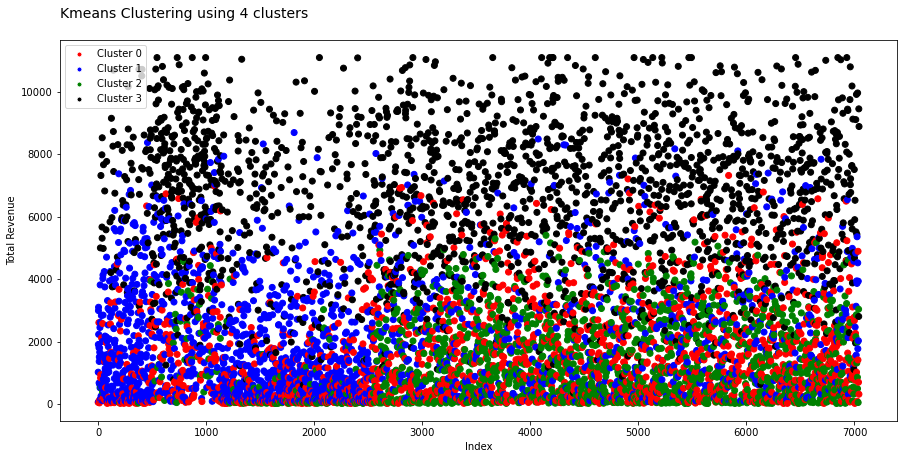

In [67]:
plt.figure(figsize=(15,7))
a3 = dfc4.clust.map({0:'red', 1:'blue', 2:'green',3: 'black'})
plt.scatter(dfc4.index,dfc4['Total Revenue'], c=a3)

from matplotlib.lines import Line2D
colors=['red','blue','green','black']
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i), 
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]

plt.legend(handles=legend_elements, loc='upper left')
plt.title('Kmeans Clustering using 4 clusters\n', loc='left', fontsize=14)
plt.xlabel('Index')
plt.ylabel('Total Revenue')

#### INSIGHTS
* Cluster 0 : This is a low revenue generating group which also uses both long distance calls and internet services. This group uses a DSL internet type connection. They prefer to have a monthly contract and paperless billing. 
* Cluster 1 : This is also a low revenue generating group which uses both long distance calls and internet services. This group also tends to use multiple lines. They prefer to have a monthly contract and paperless billing. 
* Cluster 2 : This is a  low revenue generating group which uses only long distance calls.They prefer to have two yearly contract and credit card payments with paper billing.
* Cluster 3 : This is a high revenue generating group which uses both long distance calls and Internet.They prefer to have a two yearly contract with paperless billing .They subscribe to majority of the extra services provided by the service provider.This group also tends to refer their friends to the services. 

## CONCLUSION
From the above insights the customers can be grouped into these segments considering the 3 clusters obtained using kmeans clustering:
* __High Revenue__ : This segment of customers are the highest revenue generating group where they have subscribed to all the extra services other than the long distance calls and internet services.They are contracted for a longer duration.

* __Low Revenue__ : This segment of customers are the medium revenue generating group where they have subscribed to both the long distance calls and internet services, but they have not subscribed to the extra services.They prefer a monthly contract.

* __Low Revenue__ : This segment of customers are the low revenue generating group where they have subscribed to only the long distance calls. This group doesn't have internet charges and other extra services. They prefer a two yearly contract.

### BENEFIT
From the above analysis of the customer segments we can benefit if we do the following
* Improve and Maintain the quality of service provided to the high revenue segment as they contribute a major part of the revenue.
* Implement concentrated marketing tactics to convert medium revenue segment customers to High revenue segment customers as they will most probably be willing to use the other extra services which will inturn increase the revenue.
* Increase the tarrif or carry out other cost cutting measures to keep the service provided to the existing customers profitable.
* The Internet and Extra services are a major influencing factor for a higher revenue. 